In [ ]:
!pip install kaggle
!pip install mne scipy
!pip install pyqt5
!pip install PyWavelets

import pywt
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import matplotlib
import mne
import os
import pathlib
import pandas as pd
import shutil
from pathlib import Path

matplotlib.use('Agg')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 18.3 MB/s eta 0:00:00


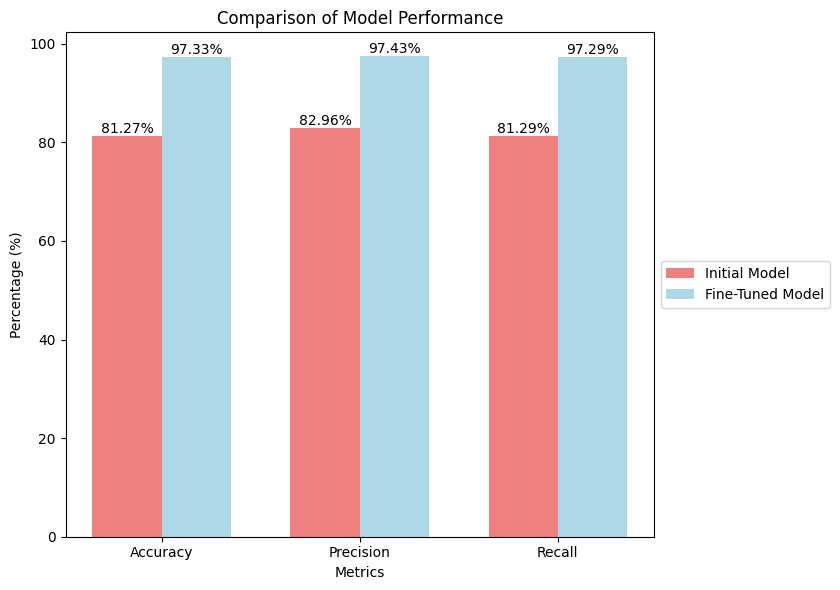

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values for initial and fine-tuned models
metrics = ['Accuracy', 'Precision', 'Recall']
initial_model_values = [81.27, 82.96, 81.29]
fine_tuned_model_values = [97.33, 97.43, 97.29]

# Set the positions and width for the bars
x = np.arange(len(metrics))
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for the initial model
bars1 = ax.bar(x - bar_width / 2, initial_model_values, bar_width, label='Initial Model', color='lightcoral')
# Bars for the fine-tuned model
bars2 = ax.bar(x + bar_width / 2, fine_tuned_model_values, bar_width, label='Fine-Tuned Model', color='lightblue')

# Adding data labels above the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Place the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display plot
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
grand_path = Path(f'/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/grand_epochs-all-tasks.fif')
grand_epoch = mne.read_epochs(grand_path, preload=True)

VEP_path = Path(f'/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/VEP/grand-epochs-VEP.fif')
VEP_epoch = mne.read_epochs(VEP_path, preload=True)

SEP_path = Path(f'/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/SEP/grand-epochs-SEP.fif')
SEP_epoch = mne.read_epochs(SEP_path, preload=True)

AEP_path = Path(f'/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/AEP/grand-epochs-AEP.fif')
AEP_epoch = mne.read_epochs(AEP_path, preload=True)

<ipython-input-4-bb250e09c24e>:2: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/grand_epochs-all-tasks.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  grand_epoch = mne.read_epochs(grand_path, preload=True)


Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/grand_epochs-all-tasks.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
17033 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-bb250e09c24e>:5: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/VEP/grand-epochs-VEP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  VEP_epoch = mne.read_epochs(VEP_path, preload=True)


Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/VEP/grand-epochs-VEP.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5673 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-bb250e09c24e>:8: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/SEP/grand-epochs-SEP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  SEP_epoch = mne.read_epochs(SEP_path, preload=True)


Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/SEP/grand-epochs-SEP.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5685 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-4-bb250e09c24e>:11: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/AEP/grand-epochs-AEP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  AEP_epoch = mne.read_epochs(AEP_path, preload=True)


Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/AEP/grand-epochs-AEP.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5675 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
# Load the SEP epochs and select the first epoch
SEP_epoch = mne.read_epochs(SEP_path, preload=True)
data = SEP_epoch[0].get_data()  # Extract data for the first epoch (no 'return_times' argument)
times = SEP_epoch.times  # Get the time vector separately
channel_data = data[0][0]  # Assuming we want to use the first channel for simplicity

# Perform Discrete Wavelet Transform (DWT) on the first channel of the first epoch
coeffs = pywt.wavedec(channel_data, 'db4', level=4)  # Use 'db4' wavelet, adjust level based on frequency needs

# Extract frequency bands based on DWT levels
delta = coeffs[4]  # Approximate coefficients for delta (0.5-4 Hz)
theta = coeffs[3]  # Theta (4-8 Hz)
alpha = coeffs[2]  # Alpha (8-13 Hz)
beta = coeffs[1]   # Beta (13-30 Hz)

Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/SEP/grand-epochs-SEP.fif ...


<ipython-input-7-4707b519ee3f>:2: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/SEP/grand-epochs-SEP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  SEP_epoch = mne.read_epochs(SEP_path, preload=True)


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5685 matching events found
No baseline correction applied
0 projection items activated


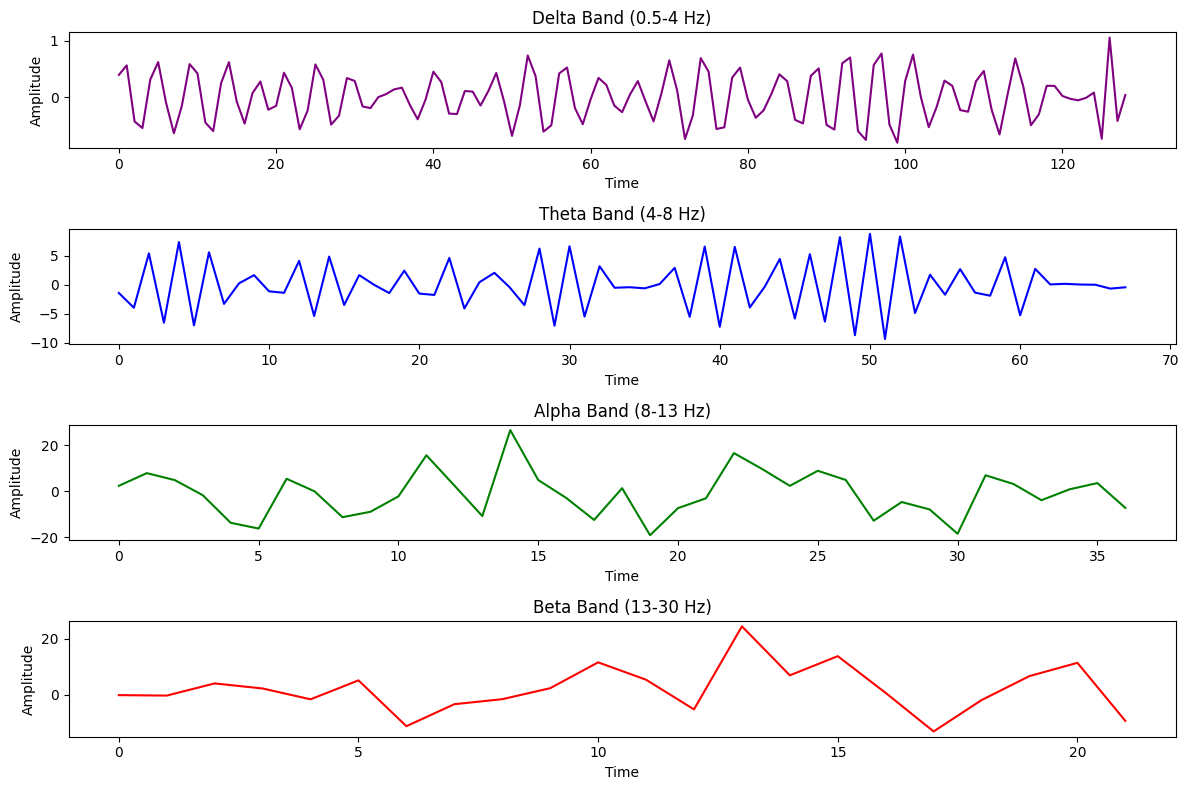

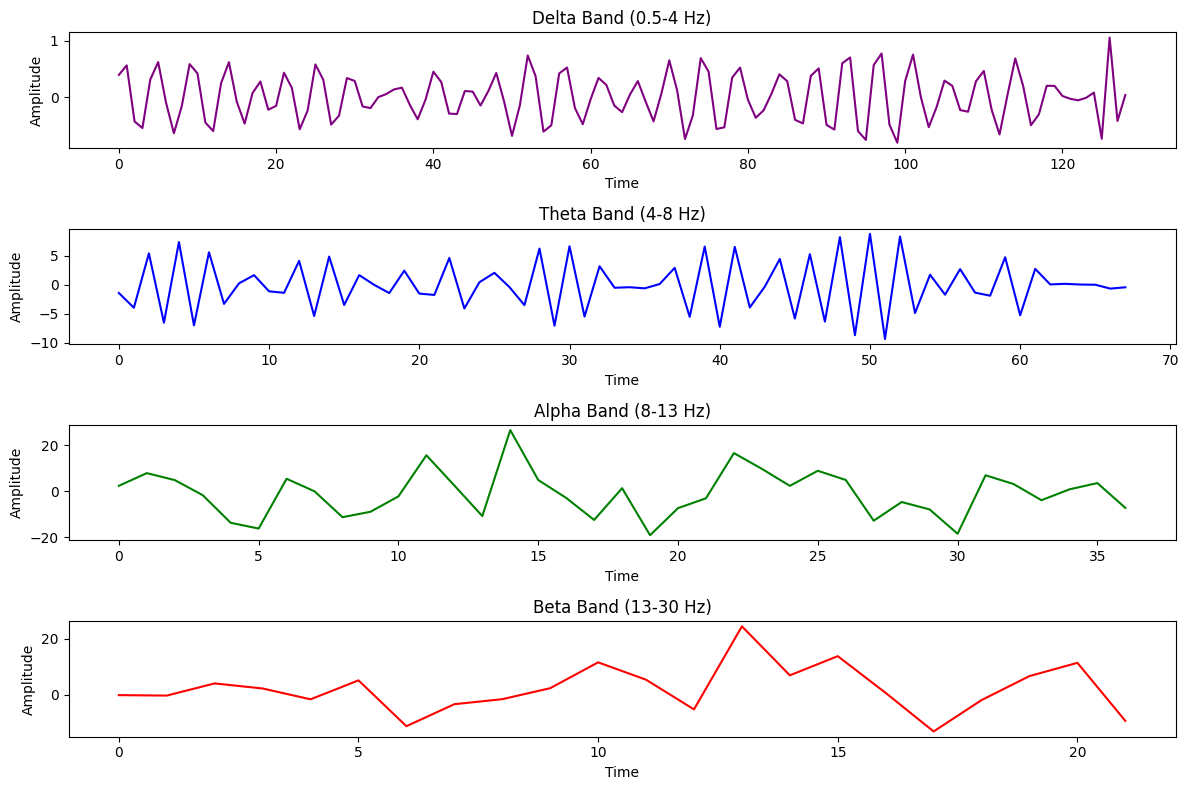

In [ ]:
%matplotlib inline
# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(delta, color='purple')
plt.title('Delta Band (0.5-4 Hz)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(theta, color='blue')
plt.title('Theta Band (4-8 Hz)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(alpha, color='green')
plt.title('Alpha Band (8-13 Hz)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(beta, color='red')
plt.title('Beta Band (13-30 Hz)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/VEP/grand-epochs-VEP.fif ...


<ipython-input-17-f8fccbcdf781>:12: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/VEP/grand-epochs-VEP.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  VEP_epoch = mne.read_epochs(VEP_path, preload=True)


    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Not setting metadata
5673 matching events found
No baseline correction applied
0 projection items activated


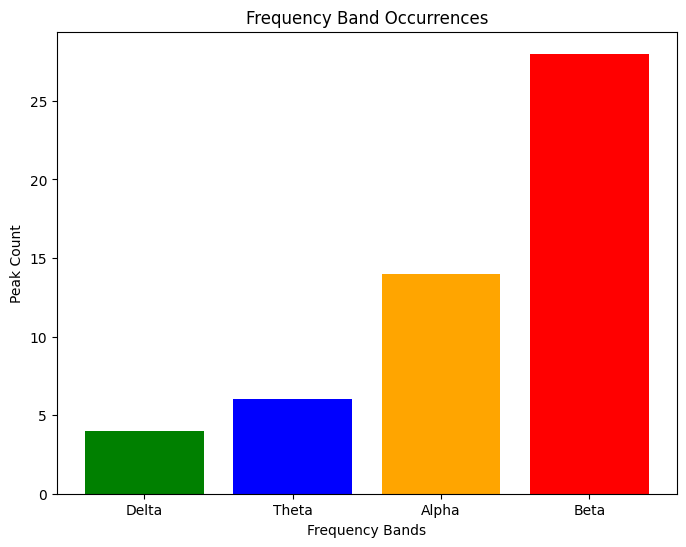

In [ ]:

from scipy.signal import find_peaks, butter, filtfilt

# Define frequency bands
bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30)
}

# Load the SEP epochs and select the first epoch
VEP_epoch = mne.read_epochs(VEP_path, preload=True)
data = VEP_epoch[0].get_data()  # Extract data for the first epoch
channel_data = data[0][32]  # Use the first channel for simplicity
sfreq = VEP_epoch.info['sfreq']  # Get the sampling frequency

# Function to apply band-pass filter
def bandpass_filter(data, low, high, sfreq, order=4):
    nyquist = 0.5 * sfreq
    low_cut = low / nyquist
    high_cut = high / nyquist
    b, a = butter(order, [low_cut, high_cut], btype="band")
    return filtfilt(b, a, data)

# Count peaks in each frequency band
counts = {}
for band, (low, high) in bands.items():
    # Filter the signal for the current band
    filtered_data = bandpass_filter(channel_data, low, high, sfreq)
    # Find peaks to count occurrences
    peaks, _ = find_peaks(np.abs(filtered_data), height=np.std(filtered_data))
    counts[band] = len(peaks)

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(counts.keys(), counts.values(), color=['green', 'blue', 'orange', 'red'])
plt.title("Frequency Band Occurrences")
plt.xlabel("Frequency Bands")
plt.ylabel("Peak Count")
plt.show()


In [ ]:
# Print the list of channel names
channel_names = AEP_epoch.info['ch_names']
print(channel_names)

# Confirm the number of channels
num_channels = len(channel_names)
print(f"Number of channels: {num_channels}")


['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9', 'TP10', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz', 'FCz', 'Marker']
Number of channels: 65


In [ ]:
VEP_copy = VEP_epoch.copy()
SEP_copy = SEP_epoch.copy()
AEP_copy = AEP_epoch.copy()

In [ ]:
picks = mne.pick_types(VEP_copy.info, eeg=True, stim=False)
VEP_epo = VEP_copy.copy().pick(picks)

picks_SEP = mne.pick_types(SEP_copy.info, eeg=True, stim=False)
SEP_epo = SEP_copy.copy().pick(picks_SEP)

picks_AEP = mne.pick_types(AEP_copy.info, eeg=True, stim=False)
AEP_epo = AEP_copy.copy().pick(picks_AEP)

In [ ]:
# Print the list of channel names
channel_names = SEP_epo.info['ch_names']
print(channel_names)

# Confirm the number of channels
num_channels = len(channel_names)
print(f"Number of channels: {num_channels}")

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'FT9', 'FT10', 'TP9', 'TP10', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz', 'FCz']
Number of channels: 64


In [ ]:
AEP_cropped = AEP_epo[:5000]
print(f"AEP epochs: {len(AEP_cropped)}")

SEP_cropped = SEP_epo[:5000]
print(f"SEP epochs: {len(SEP_cropped)}")

VEP_cropped = VEP_epo[:5000]
print(f"VEP epochs: {len(VEP_cropped)}")

AEP epochs: 5000
SEP epochs: 5000
VEP epochs: 5000


In [ ]:
AEP_cropped.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

In [ ]:
AEP_cropped.save(f'/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/AEP-cropped-5000.fif', overwrite=True)

SEP_cropped.save(f'/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/SEP-cropped-5000.fif', overwrite=True)

VEP_cropped.save(f'/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/VEP-cropped-5000.fif', overwrite=True)

<ipython-input-10-29dbddb90662>:1: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/AEP-cropped-5000.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  AEP_cropped.save(f'/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/AEP-cropped-5000.fif', overwrite=True)
<ipython-input-10-29dbddb90662>:3: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/SEP-cropped-5000.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  SEP_cropped.save(f'/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/SEP-cropped-5000.fif', overwrite=True)
<ipython-input-10-29dbddb90662>:5: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/1000-epo-files/VEP-cropped-5000.fif) does not conform to MNE naming conventions. All epochs files should end with -

In [ ]:
epochs_data = grand_epoch.get_data()

# Check the shape of the data
print(epochs_data.shape)

(17033, 65, 251)


In [ ]:
first_epoch_data = AEP_epoch[25].get_data()

# Print the shape of the first epoch
print(f"Shape of the first epoch: {first_epoch_data.shape}")

Shape of the first epoch: (1, 65, 251)


In [ ]:
VEP_epoch

<EpochsFIF | 5673 events (all good), -0.2 – 0.8 s (baseline -0.2 – 0 s), ~706.2 MB, data loaded,
 'VEP': 5673>

In [ ]:
# Extract the first epoch data
first_epoch_data = grand_epoch[0].get_data()

# Print the shape of the first epoch
print(f"Shape of the first epoch: {first_epoch_data.shape}")  # Should be (1, n_channels, n_times)

# Retrieve the event for the first epoch
# grand_epoch.events contains all the events, and the first one corresponds to the first epoch
first_epoch_event = grand_epoch.events[0]

# Display the event information
print(f"Event for the first epoch (sample index, previous event ID, event ID): {first_epoch_event}")

# Get the event ID
event_id = first_epoch_event[2]
print(f"Event ID for the first epoch: {event_id}")


Shape of the first epoch: (1, 65, 251)
Event for the first epoch (sample index, previous event ID, event ID): [499   0   3]
Event ID for the first epoch: 3


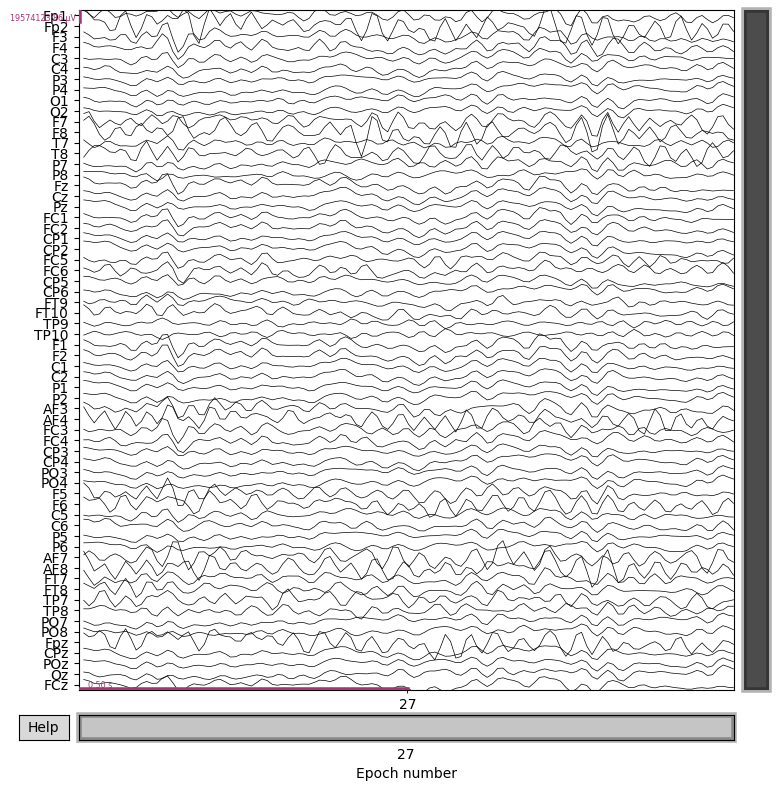

In [ ]:
grand_epoch[27].plot(n_channels=65, scalings='auto', show=True, block=True)


In [ ]:
print(grand_epoch.event_id)
print(grand_epoch.events.shape[0])

{'VEP': 3, 'SEP': 5, 'AEP': 4}
17033


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


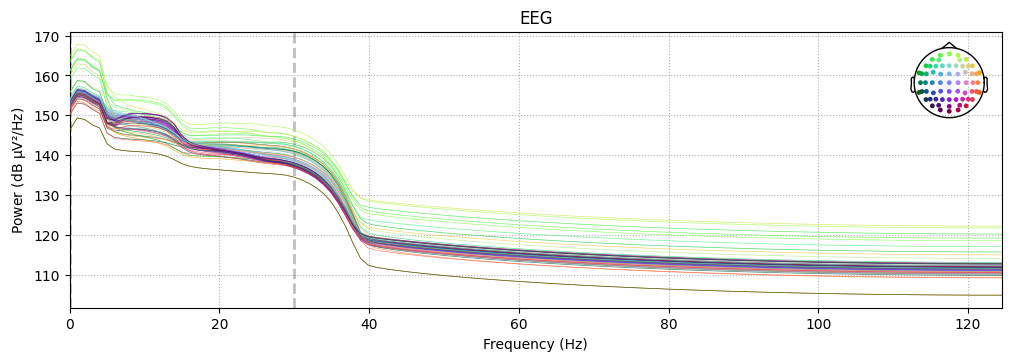

In [ ]:
grand_epoch["SEP"].compute_psd().plot(picks="eeg", exclude="bads", amplitude=False)

In [ ]:
evokeds_path = Path(f'/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/evoked_tasks/evoked-all-tasks.fif')

evokeds_list = mne.read_evokeds(fname=evokeds_path)

Reading /content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/evoked_tasks/evoked-all-tasks.fif ...


<ipython-input-4-4d5656ab006f>:3: RuntimeWarning: This filename (/content/drive/My Drive/mindlock-eeg-files/session-1/sum-epochs/evoked_tasks/evoked-all-tasks.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evokeds_list = mne.read_evokeds(fname=evokeds_path)


    Found the data of interest:
        t =    -200.00 ...     800.00 ms (SEP)
        0 CTF compensation matrices available
        nave = 5685 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (VEP)
        0 CTF compensation matrices available
        nave = 5673 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)
    Found the data of interest:
        t =    -200.00 ...     800.00 ms (AEP)
        0 CTF compensation matrices available
        nave = 5675 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.2, 0] s)


In [ ]:
conds = ("SEP", "VEP", "AEP")
evokeds = dict(zip(conds, evokeds_list))

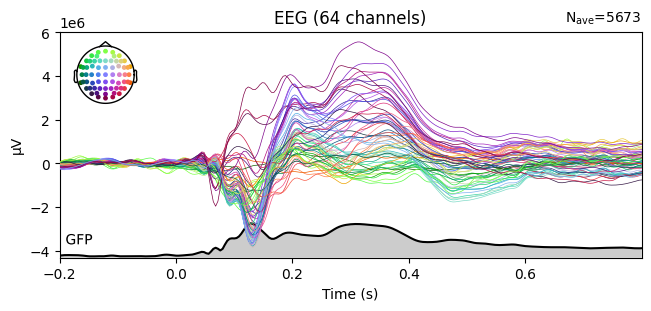

In [ ]:
evokeds['VEP'].plot(picks="eeg", spatial_colors=True, gfp=True)

No projector specified for this dataset. Please consider the method self.add_proj.


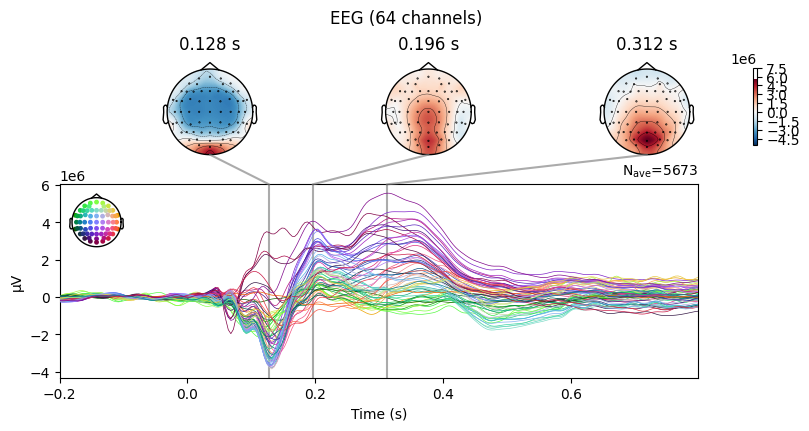

In [ ]:
evokeds['VEP'].plot_joint()

In [ ]:
'''

 Next step for mindlock

 - Feature extraction using CNN (CNN works with labels ie sub001, sub002)

 - CNN will works as a binary classification (enrolled user vs. intruder)

 - after training the CNN model, The CNN's later or final layers will be the feature extracted

 - extracted feature vectors from the CNN are used as input to the SVM (supervised learning)

 - SVM acts as a classifier

 - During the testing phase, new EEG data will be passed through the trained CNN to extract features, then be fed into the SVM to make the final classification.

'''

# Multi-Class Classification

# The integrated model of CNN-SVM will do the following tasks:
# 1. determine whether the EEG data belongs to an enrolled user or an intruder
# 2. State the identity of the user (sub001, sub002, etc)

